In [181]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [182]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns



In [183]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,Bidirectional
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import pad_sequences

%matplotlib inline


In [184]:
df=pd.read_json('D://Sarcasm_Headlines_Dataset.json', lines=True)

In [139]:
df

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


In [140]:
df.to_csv("sarcasm_headlines_onion_huff.csv.gz",index=False,compression="gzip")


In [185]:
df.columns


Index(['is_sarcastic', 'headline', 'article_link'], dtype='object')

In [142]:
pd.value_counts(df['is_sarcastic'])

0    14985
1    13634
Name: is_sarcastic, dtype: int64

<AxesSubplot:>

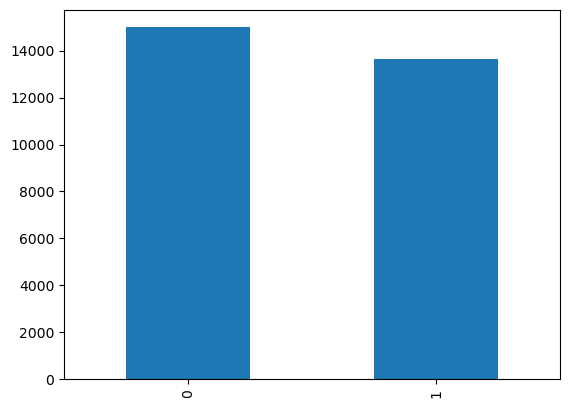

In [143]:
pd.value_counts(df['is_sarcastic']).plot(kind = 'bar')

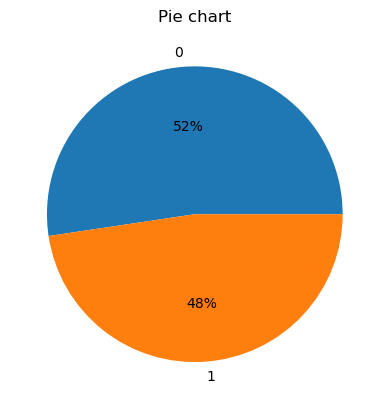

In [144]:
df['is_sarcastic'].value_counts().plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [145]:
df.drop(['article_link'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
dtypes: int64(1), object(1)
memory usage: 447.3+ KB


In [146]:
df['message_len'] = df['headline'].apply(len)
df.head()

,is_sarcastic,headline,message_len
0,1,thirtysomething scientists unveil doomsday clo...,61
1,0,dem rep. totally nails why congress is falling...,79
2,0,eat your veggies: 9 deliciously different recipes,49
3,1,inclement weather prevents liar from getting t...,52
4,1,mother comes pretty close to using word 'strea...,61


c:\Users\thenu\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='message_len', ylabel='Density'>

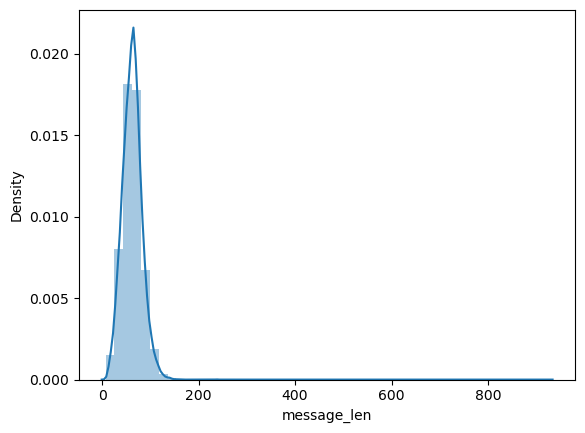

In [147]:
sns.distplot(df['message_len'])


<AxesSubplot:xlabel='message_len'>

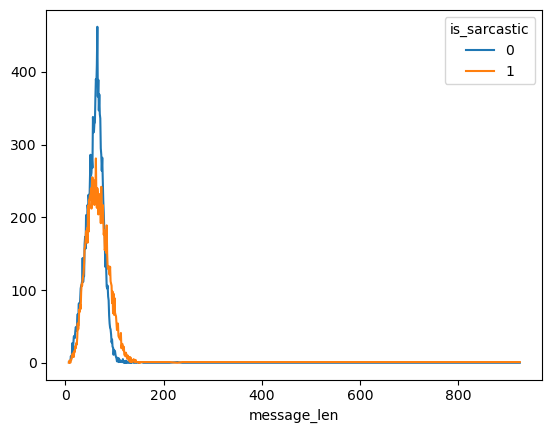

In [148]:
pd.crosstab(df['message_len'],df['is_sarcastic']).plot()


In [149]:
df.describe()


,is_sarcastic,message_len
count,28619.000000,28619.000000
mean,0.476397,62.308571
std,0.499451,20.726483
min,0.000000,7.000000
25%,0.000000,49.000000
50%,0.000000,62.000000
75%,1.000000,75.000000
max,1.000000,926.000000


In [170]:
df['text'] = df['headline'].apply(lambda x: x.lower())


KeyError: 'headline'

In [151]:
df

,is_sarcastic,headline,message_len,text
0,1,thirtysomething scientists unveil doomsday clo...,61,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...,79,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes,49,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...,52,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...,61,mother comes pretty close to using word 'strea...
...,...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,44,jews to celebrate rosh hashasha or something
28615,1,internal affairs investigator disappointed con...,87,internal affairs investigator disappointed con...
28616,0,the most beautiful acceptance speech this week...,71,the most beautiful acceptance speech this week...
28617,1,mars probe destroyed by orbiting spielberg-gat...,61,mars probe destroyed by orbiting spielberg-gat...


In [152]:
from nltk.corpus import stopwords
# Removing stop words
import string
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thenu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [153]:
stop = set(stopwords.words('english'))
#[nltk_data] Downloading package stopwords to /root/nltk_data...
#[nltk_data]   Package stopwords is already up-to-date!
df['text'] = df['text'].apply(lambda words: ' '.join(word for word in words.split() if word not in stop))


In [154]:
df['text'] = df['text'].apply(lambda words: ' '.join(word for word in words.split() if word not in stop))


In [155]:

df['text'] = df['text'].str.replace('[^\w\s]','')

C:\Users\thenu\AppData\Local\Temp\ipykernel_46280\3429844386.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]','')


In [156]:
df

,is_sarcastic,headline,message_len,text
0,1,thirtysomething scientists unveil doomsday clo...,61,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...,79,dem rep totally nails congress falling short g...
2,0,eat your veggies: 9 deliciously different recipes,49,eat veggies 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...,52,inclement weather prevents liar getting work
4,1,mother comes pretty close to using word 'strea...,61,mother comes pretty close using word streaming...
...,...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,44,jews celebrate rosh hashasha something
28615,1,internal affairs investigator disappointed con...,87,internal affairs investigator disappointed con...
28616,0,the most beautiful acceptance speech this week...,71,beautiful acceptance speech week came queer ko...
28617,1,mars probe destroyed by orbiting spielberg-gat...,61,mars probe destroyed orbiting spielberggates s...


In [161]:
df.drop('headline',axis=1,inplace=True)
#data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)


In [162]:
X = df['text']
y = df['is_sarcastic']

In [163]:
#Splitting the data into train and test set using default size
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df['text'],y,test_size=0.25)


In [171]:
max_words = 1000
max_len = 100




In [172]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences



In [166]:

tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)


In [178]:
# define model

#from unicodedata import bidirectional
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras.layers import Bidirectional



def rnn_model():
    # create model
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer= (Bidirectional(LSTM(150, return_sequences = True)))
   # layer = LSTM(64)(layer)
    layer = Dense(256,name='Features')(layer)
    layer = Activation('relu')(layer)
    layer = Dense(1,name='Out')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [180]:
# build the model
model = rnn_model()


TypeError: Inputs to a layer should be tensors. Got: <keras.layers.rnn.bidirectional.Bidirectional object at 0x000001AA25DCBCA0>

In [ ]:
model.summary()
model.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy']) ### Loss function = binary cross entropy


In [ ]:
# Fit the model
training_history = model.fit(sequences_matrix,Y_train,batch_size=32,epochs=20,
          validation_split=0.2)


In [ ]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

per = model.evaluate(test_sequences_matrix,Y_test)


In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(per[0],per[1]))
